In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas.io.data import DataReader

/home/zola25/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
from datetime import datetime
from __future__ import division

In [5]:
#List of pharmaceutical comapnies
companies=['NVS','PFE','GSK'] 

In [6]:
date=datetime.now() #Present date
start=datetime(date.year-4,date.month,date.day) #Start date
end=datetime(date.year-1,date.month,date.day) #End date

In [7]:
for company in companies:            #Getting stock data of the companies from Yahoo finance
    globals()[company]=DataReader(company,'yahoo',start,end)

In [8]:
NVS.head() #Checking the output

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-10-11,61.919998,61.959999,61.430000,61.490002,735500,53.641043
2012-10-12,61.689999,61.889999,61.540001,61.610001,739700,53.745725
2012-10-15,62.240002,62.410000,62.070000,62.310001,1373400,54.356373
2012-10-16,63.310001,63.389999,62.189999,63.180000,1794800,55.115320
2012-10-17,63.549999,63.650002,63.389999,63.490002,1110800,55.385751


In [9]:
NVS.info() #Basic info

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2012-10-11 to 2015-10-09
Data columns (total 6 columns):
Open         753 non-null float64
High         753 non-null float64
Low          753 non-null float64
Close        753 non-null float64
Volume       753 non-null int64
Adj Close    753 non-null float64
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


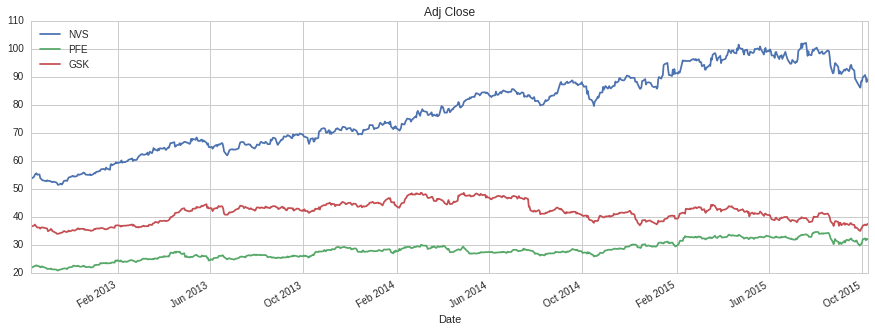

In [10]:
#Historical view of variation in adjusted closing prices 

NVS['Adj Close'].plot(legend=True,figsize=(15,5),label='NVS',title='Adj Close')
PFE['Adj Close'].plot(legend=True,figsize=(15,5),label='PFE')
GSK['Adj Close'].plot(legend=True,figsize=(15,5),label='GSK')

In [11]:
days=[25,50,100] #Number of days for which the moving averages are calculated

In [12]:
#Calculating moving averages for the above days

for day in days:
    column_name="Moving Average for {} days".format(str(day))
    NVS[column_name]=pd.rolling_mean(NVS['Adj Close'],day)

for day in days:
    column_name="Moving Average for {} days".format(str(day))
    GSK[column_name]=pd.rolling_mean(GSK['Adj Close'],day)
    
for day in days:
    column_name="Moving Average for {} days".format(str(day))
    PFE[column_name]=pd.rolling_mean(PFE['Adj Close'],day)

/home/zola25/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
/home/zola25/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
/home/zola25/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
/home/zola25/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
/home/zola25/anaconda2/lib/python2.7/site-packages/ipykernel/__

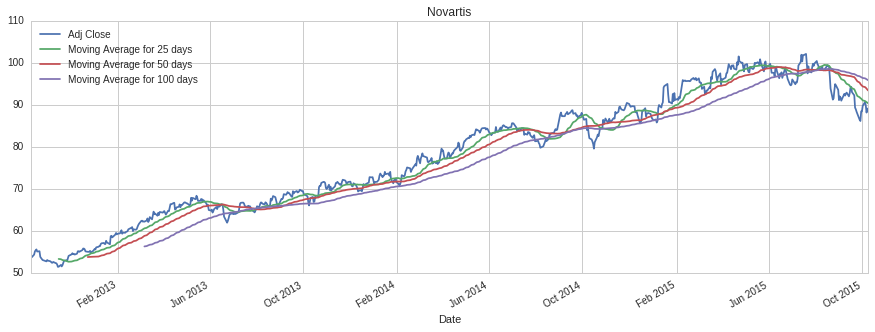

In [13]:
#Graphical view of the moving averages of Novartis

NVS[['Adj Close','Moving Average for 25 days','Moving Average for 50 days','Moving Average for 100 days']].plot(figsize=(15,5),title='Novartis')

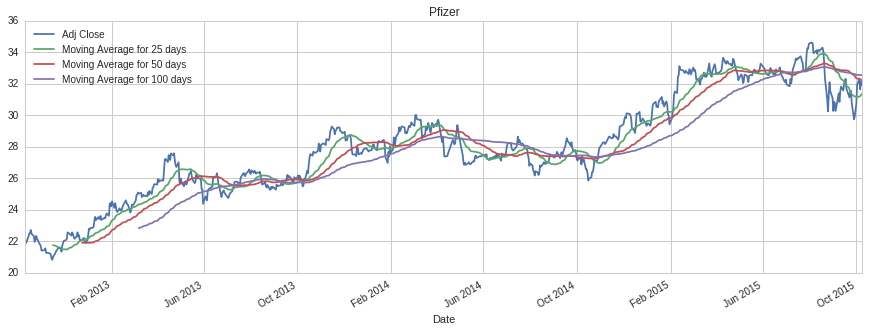

In [14]:
#Graphical view of the moving averages of Pfizer

PFE[['Adj Close','Moving Average for 25 days','Moving Average for 50 days','Moving Average for 100 days']].plot(figsize=(15,5),title='Pfizer')

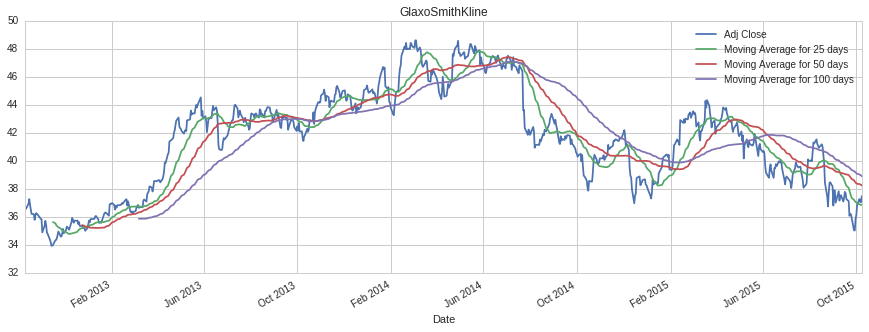

In [15]:
#Graphical view of the moving averages of GlaxoSmithKline

GSK[['Adj Close','Moving Average for 25 days','Moving Average for 50 days','Moving Average for 100 days']].plot(figsize=(15,5),title='GlaxoSmithKline')

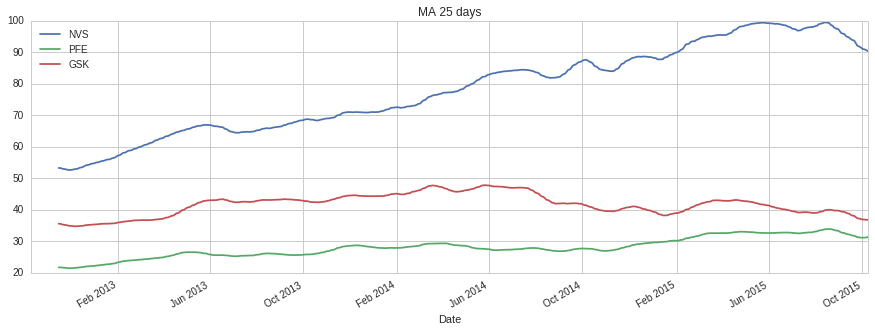

In [16]:
#Comparing moving averages for 25 days of each company

NVS['Moving Average for 25 days'].plot(legend=True,figsize=(15,5),label='NVS',title='MA 25 days')
PFE['Moving Average for 25 days'].plot(legend=True,figsize=(15,5),label='PFE')
GSK['Moving Average for 25 days'].plot(legend=True,figsize=(15,5),label='GSK')

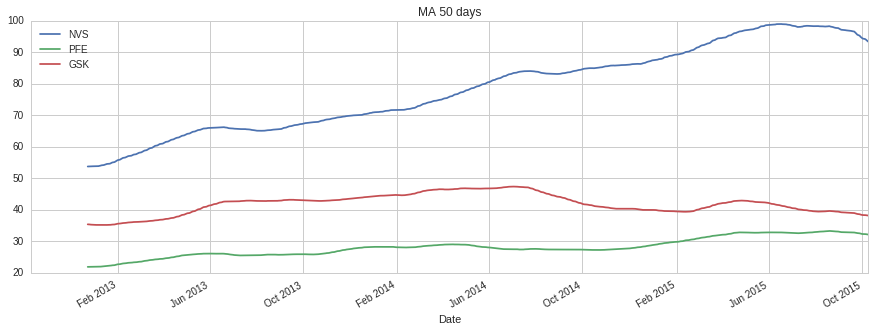

In [17]:
#Comparing moving averages for 50 days of each company

NVS['Moving Average for 50 days'].plot(legend=True,figsize=(15,5),label='NVS',title='MA 50 days')
PFE['Moving Average for 50 days'].plot(legend=True,figsize=(15,5),label='PFE')
GSK['Moving Average for 50 days'].plot(legend=True,figsize=(15,5),label='GSK')

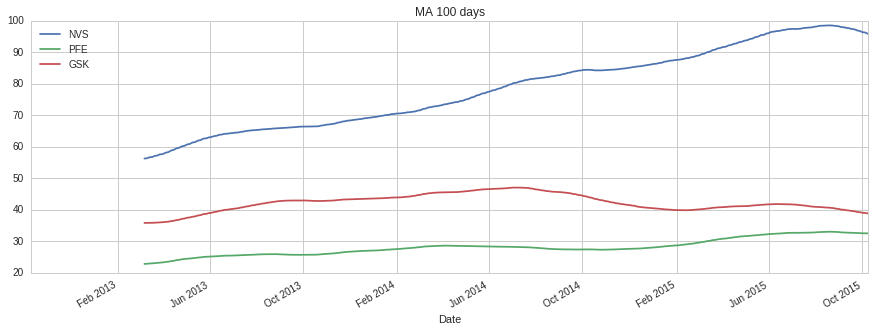

In [18]:
#Comparing moving averages for 100 days of each company 

NVS['Moving Average for 100 days'].plot(legend=True,figsize=(15,5),label='NVS',title='MA 100 days')
PFE['Moving Average for 100 days'].plot(legend=True,figsize=(15,5),label='PFE')
GSK['Moving Average for 100 days'].plot(legend=True,figsize=(15,5),label='GSK')

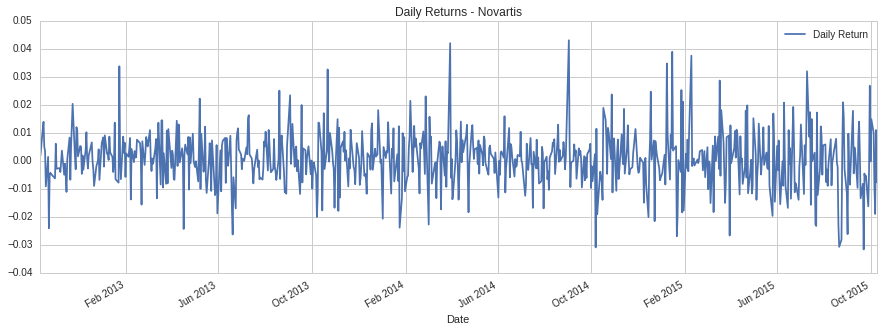

In [19]:
#Historical view of daily returns of Novartis

NVS['Daily Return']=NVS['Adj Close'].pct_change()
NVS['Daily Return'].plot(figsize=(15,5),legend=True,title='Daily Returns - Novartis')

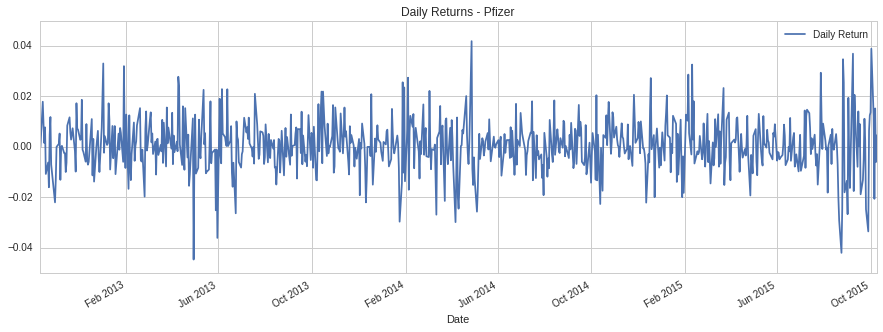

In [20]:
#Historical view of daily returns of Pfizer

PFE['Daily Return']=PFE['Adj Close'].pct_change()
PFE['Daily Return'].plot(figsize=(15,5),legend=True,title='Daily Returns - Pfizer')

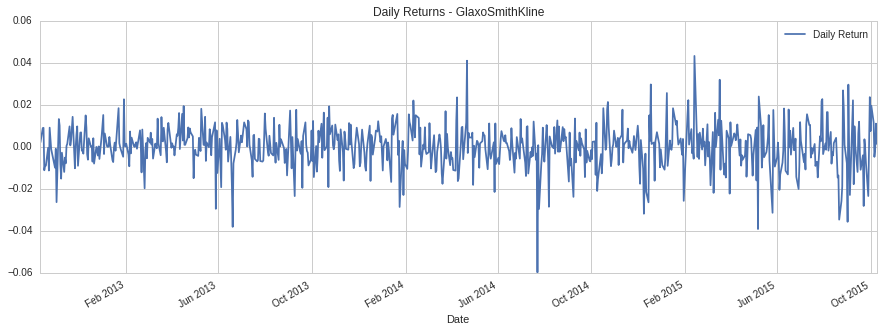

In [21]:
#Historical view of daily returns of GlaxoSmithKline

GSK['Daily Return']=GSK['Adj Close'].pct_change()
GSK['Daily Return'].plot(figsize=(15,5),legend=True,title='Daily Returns - GlaxoSmithKline')

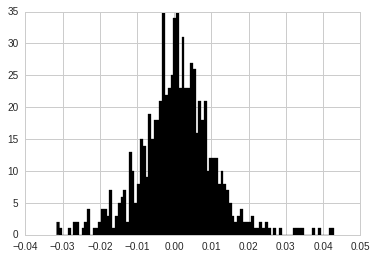

In [22]:
#Histogram of daily returns of Novartis

NVS['Daily Return'].hist(bins=100,color='black')

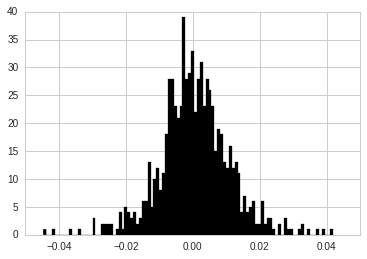

In [23]:
#Histogram of daily returns of Pfizer

PFE['Daily Return'].hist(bins=100,color='black')

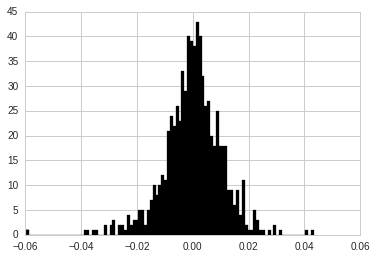

In [24]:
#Histogram of daily returns of GlaxoSmithKline

GSK['Daily Return'].hist(bins=100,color='black')

# Daily Returns

In [25]:
#DataFrame comprising of adjusted closing prices of the three companies
adj_close=DataReader(companies,'yahoo',start,end)['Adj Close']

In [26]:
#Checking the output
adj_close.tail()

,GSK,NVS,PFE
Date,,,
2015-10-05,37.265669,90.667338,32.320839
2015-10-06,37.088482,89.868470,31.654729
2015-10-07,37.041854,88.164843,32.137418
2015-10-08,37.452185,89.136969,31.944342
2015-10-09,37.508141,88.453596,32.089150


In [27]:
#Getting the daily returns of stocks
returns=adj_close.pct_change()

In [28]:
#Checking the output
returns.head()

,GSK,NVS,PFE
Date,,,
2012-10-11,NaN,NaN,NaN
2012-10-12,0.002187,0.001952,0.000000
2012-10-15,0.008946,0.011362,0.017914
2012-10-16,0.009083,0.013962,0.008995
2012-10-17,-0.011144,0.004907,0.001550


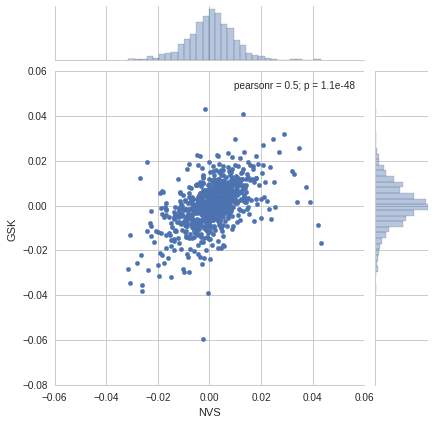

In [29]:
#Scatter plot of daily returns of Novartis and GlaxoSmithKline
sns.jointplot('NVS','GSK',returns,kind='scatter')

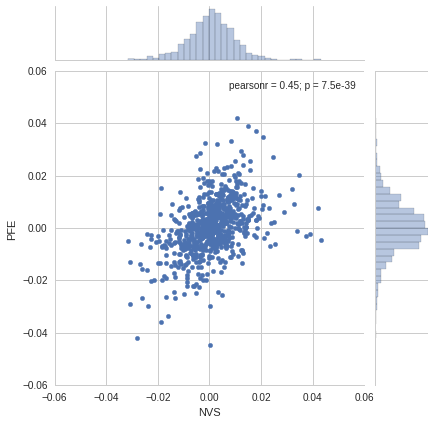

In [30]:
#Scatter plot of daily returns of Novartis and Pfizer
sns.jointplot('NVS','PFE',returns,kind='scatter')

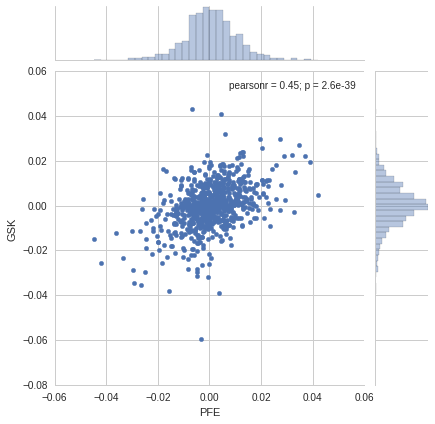

In [31]:
#Scatter plot of daily returns of Pfizer and GlaxoSmithKline
sns.jointplot('PFE','GSK',returns,kind='scatter')

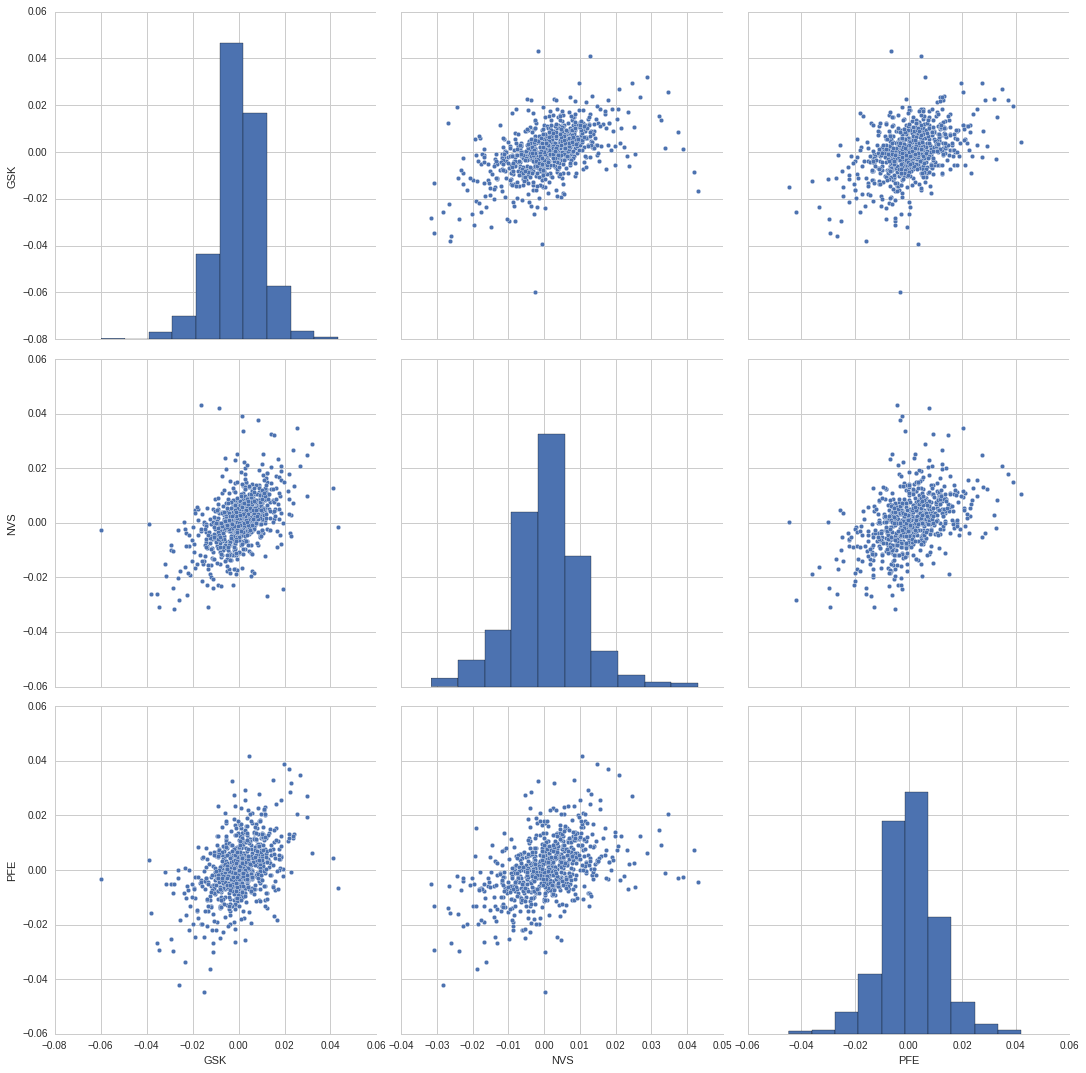

In [32]:
#Comparing daily returns of every company in the list with each other
sns.pairplot(returns.dropna(),size=5)

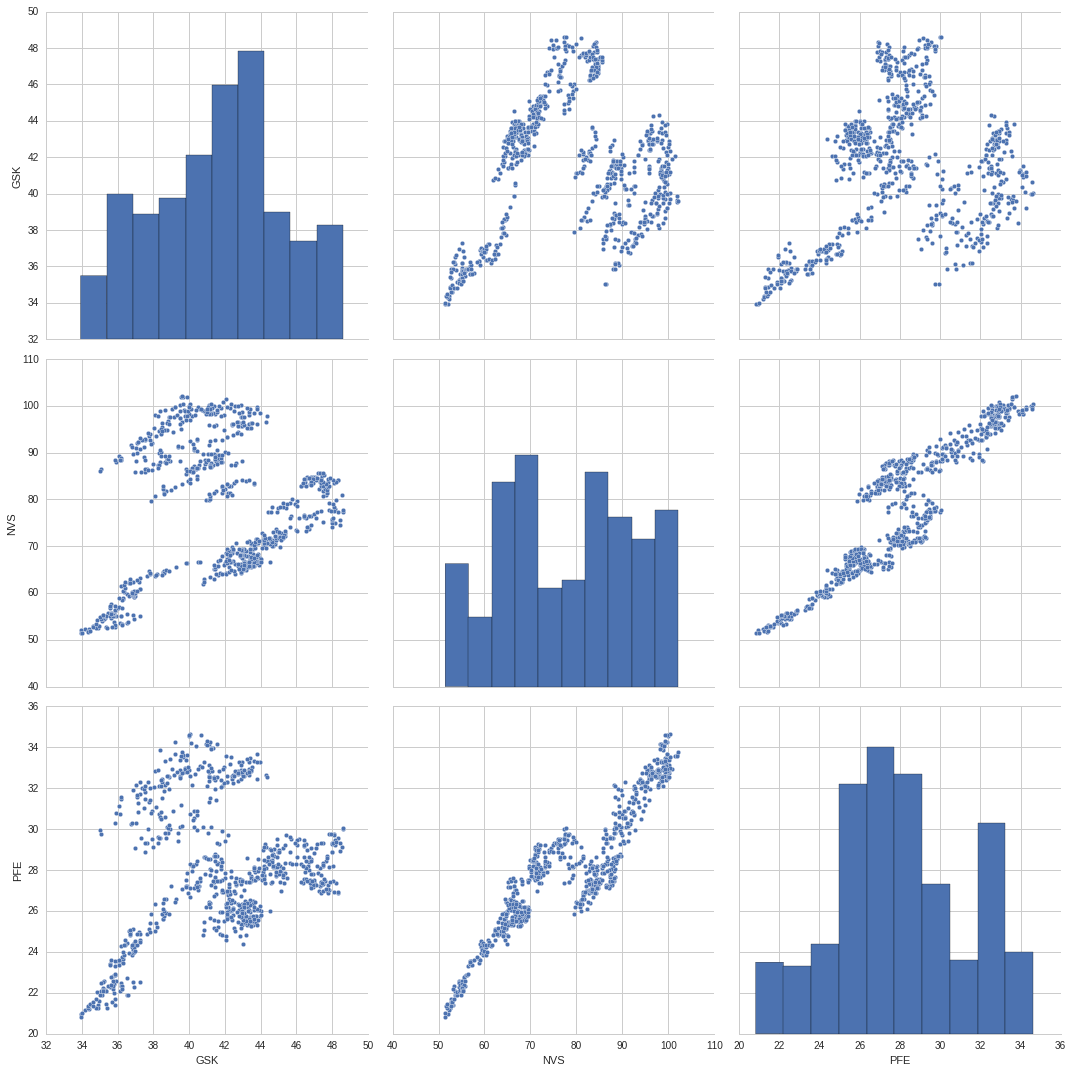

In [33]:
#Comparing ajusted closing prices of every company in the list with each other

sns.pairplot(adj_close.dropna(),size=5)

In [34]:
#Calculating correlation between daily returns of each company
returns.dropna().corr()

,GSK,NVS,PFE
GSK,1.000000,0.499352,0.452959
NVS,0.499352,1.000000,0.450449
PFE,0.452959,0.450449,1.000000


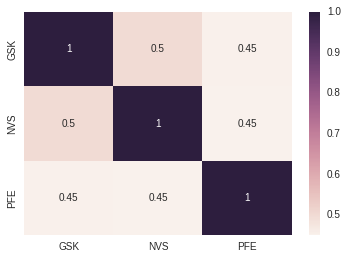

In [35]:
#Correlation map showing the above
sns.heatmap(returns.corr(),annot=True)

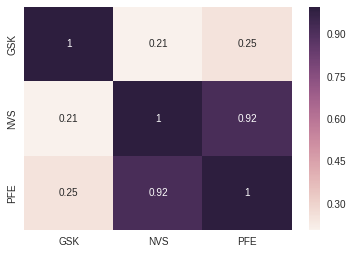

In [36]:
#Correlation map showing the correlation between adjusted closing prices 
sns.heatmap(adj_close.corr(),annot=True)

# Value At Risk

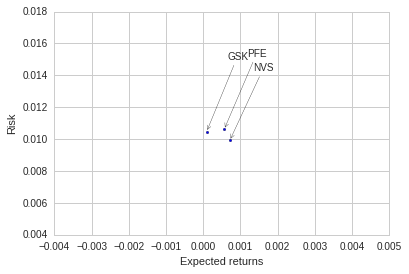

In [37]:
rets = returns.dropna() #DataFrame of the daily returns without the null values
plt.scatter(rets.mean(), rets.std(),s=np.pi*2) #The last term is the area of the circle

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()): #Labellng the scatter plot
    plt.annotate(label, xy = (x, y), xytext = (20+5000*x, 20+5000*y), textcoords ='offset points', arrowprops = dict(arrowstyle = '->'))

In [38]:
rets['GSK'].quantile(.05) #With 95% confidence, we can say that our worst daily loss on GlaxomithKline will not be greater than 1.75%

-0.017569061389238298

In [39]:
rets['NVS'].quantile(.05) #With 95% confidence, we can say that our worst daily loss on Novartis will not be greater than 1.59%

-0.015913501909113451

In [40]:
rets['PFE'].quantile(.05) #With 95% confidence, we can say that our worst daily loss on Pfizer will not be greater than 1.64%

-0.016460148314272741

In [41]:
days=365 #Number of days for which the Monte Carlo Simulation will be carried out
dt=1/days #Change in time

In [42]:
#This function returns the simulated price array
def monte_carlo(start_price,days,avg_return,std_dev):
    price=np.zeros(days)
    price[0]=start_price
    
    drift=np.zeros(days)
    shock=np.zeros(days)
    
    for i in range(1,days):
        
        drift[i]=avg_return*dt
        shock[i]=np.random.normal(loc=avg_return*dt,scale=std_dev*np.sqrt(dt))
        price[i]=price[i-1]+(price[i-1]*(drift[i]+shock[i]))
        
    return price  

In [43]:
#Defining the start price,average daily return and standard deviation for Novartis
start_price_nvs=NVS['Adj Close'][-1]
mu_nvs=rets.mean()['NVS']
sigma_nvs=rets.std()['NVS']

In [44]:
#Defining the start price,average daily return and standard deviation for Pfizer
start_price_pfe=PFE['Adj Close'][-1]
mu_pfe=rets.mean()['PFE']
sigma_pfe=rets.std()['PFE']

In [45]:
#Defining the start price,average daily return and standard deviation for GlaxoSmithKline
start_price_gsk=GSK['Adj Close'][-1]
mu_gsk=rets.mean()['GSK']
sigma_gsk=rets.std()['GSK']

In [46]:
runs=1000 #Total number of runs for the simulation
#Defining arrays to store the predicted daily price
avg_price_nvs=np.zeros(runs)
avg_price_pfe=np.zeros(runs)
avg_price_gsk=np.zeros(runs)

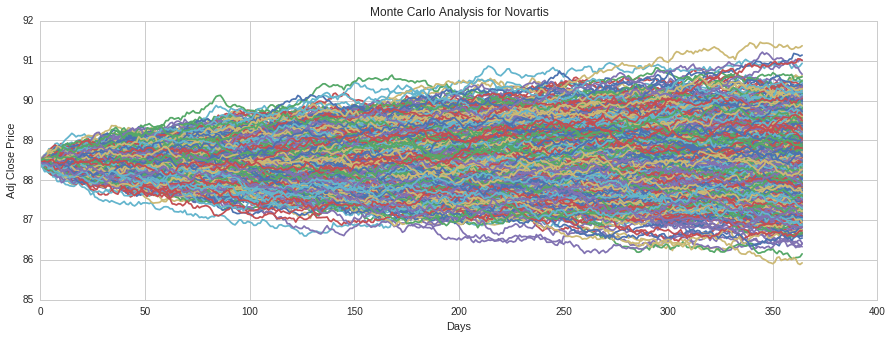

In [47]:
#Carrying out the Monte Carlo Simulation for Novartis
plt.figure(figsize=(15,5))
for run in range(runs):
    a=monte_carlo(start_price_nvs,days,mu_nvs,sigma_nvs)
    plt.plot(a)
    avg_price_nvs[run]=a[-1]
    
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Monte Carlo Analysis for Novartis')

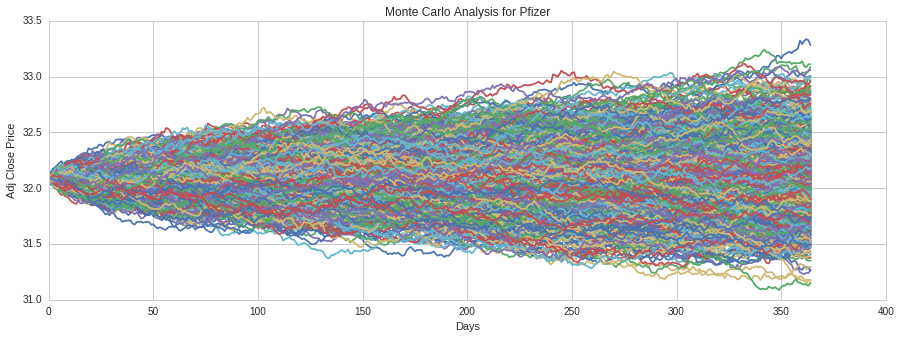

In [48]:
#Carrying out the Monte Carlo Simulation for Pfizer
plt.figure(figsize=(15,5))
for run in range(1000):
    a=monte_carlo(start_price_pfe,days,mu_pfe,sigma_pfe)
    plt.plot(a)
    avg_price_pfe[run]=a[-1]
    
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Monte Carlo Analysis for Pfizer')

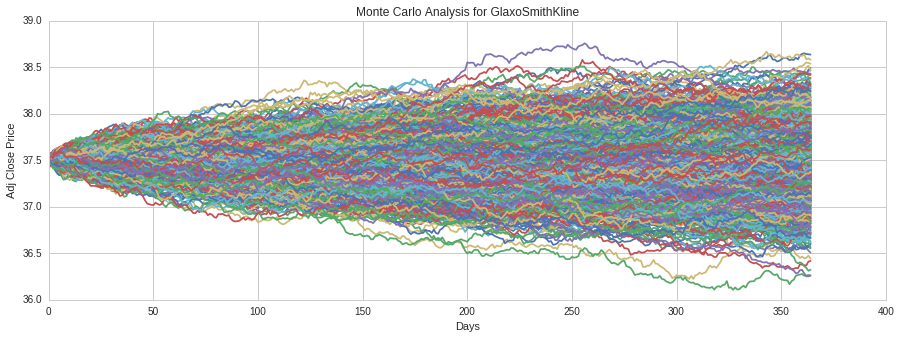

In [49]:
#Carrying out the Monte Carlo Simulation for GlaxoSmithKline
plt.figure(figsize=(15,5))
for run in range(1000):
    a=monte_carlo(start_price_gsk,days,mu_gsk,sigma_gsk)
    plt.plot(a)
    avg_price_gsk[run]=a[-1]
    
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Monte Carlo Analysis for GlaxoSmithKline')

In [50]:
avg_nvs=avg_price_nvs.mean() #Mean final price for Novartis

In [51]:
avg_pfe=avg_price_pfe.mean() #Mean final price for Pfizer

In [52]:
avg_gsk=avg_price_gsk.mean() #Mean final price for GlaxoSmithKline

In [53]:
avg_nvs

88.52432105399555

In [54]:
avg_pfe

32.121427658450308

In [55]:
avg_gsk

37.489082498377485